In [56]:
from spektral.layers import GraphConv,EdgeConditionedConv
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
import import_ipynb

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [58]:
import numpy as np
from scipy import sparse

In [59]:
from flight_network import A, X, y

In [60]:
y = np.asarray(y)
N = A.shape[0]
F = X.shape[-1]

In [61]:
A = GraphConv.preprocess(A).astype('f4')

In [70]:
learning_rate = 1e-3
X_in = Input(shape=(F, ))
A_in = Input((N, ), sparse=True)

X_1 = GraphConv(51, 'relu')([X_in, A_in])
X_2 = GraphConv(51, 'relu')([X_1, A_in])
X_3 = GraphConv(51, 'relu')([X_2, A_in])
output = Dense(1)(X_3)
model = Model(inputs=[X_in, A_in], outputs=output)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
graph_conv_20 (GraphConv)       (None, 51)           255         input_15[0][0]                   
                                                                 input_16[0][0]                   
__________________________________________________________________________________________________
graph_conv_21 (GraphConv)       (None, 51)           2652        graph_conv_20[0][0]        

In [63]:
A = A.astype('f4')

In [77]:
model.fit([X, A], y,
          batch_size = N, 
          epochs = 200,
          shuffle=False)

Train on 51 samples
Epoch 1/200
51/51 [==============================] - 0s 196us/sample - loss: 92085.3125 - mse: 92085.3125 - mae: 201.8776
Epoch 2/200
51/51 [==============================] - 0s 295us/sample - loss: 92084.4766 - mse: 92084.4766 - mae: 201.6265
Epoch 3/200
51/51 [==============================] - 0s 335us/sample - loss: 92084.0234 - mse: 92084.0234 - mae: 201.4499
Epoch 4/200
51/51 [==============================] - 0s 310us/sample - loss: 92083.2031 - mse: 92083.2031 - mae: 201.6041
Epoch 5/200
51/51 [==============================] - 0s 301us/sample - loss: 92082.5859 - mse: 92082.5859 - mae: 201.7530
Epoch 6/200
51/51 [==============================] - 0s 305us/sample - loss: 92081.6406 - mse: 92081.6406 - mae: 201.6684
Epoch 7/200
51/51 [==============================] - 0s 269us/sample - loss: 92080.6875 - mse: 92080.6875 - mae: 201.4914
Epoch 8/200
51/51 [==============================] - 0s 290us/sample - loss: 92079.5859 - mse: 92079.5859 - mae: 201.5005
Epoc

Epoch 68/200
51/51 [==============================] - 0s 323us/sample - loss: 92030.6250 - mse: 92030.6250 - mae: 200.8716
Epoch 69/200
51/51 [==============================] - 0s 353us/sample - loss: 92032.1797 - mse: 92032.1797 - mae: 202.3526
Epoch 70/200
51/51 [==============================] - 0s 377us/sample - loss: 92030.4297 - mse: 92030.4297 - mae: 200.6398
Epoch 71/200
51/51 [==============================] - 0s 375us/sample - loss: 92026.9297 - mse: 92026.9297 - mae: 201.8981
Epoch 72/200
51/51 [==============================] - 0s 290us/sample - loss: 92024.9766 - mse: 92024.9766 - mae: 201.5181
Epoch 73/200
51/51 [==============================] - 0s 229us/sample - loss: 92025.6562 - mse: 92025.6562 - mae: 200.8720
Epoch 74/200
51/51 [==============================] - 0s 223us/sample - loss: 92026.5000 - mse: 92026.5000 - mae: 202.2255
Epoch 75/200
51/51 [==============================] - 0s 234us/sample - loss: 92025.5703 - mse: 92025.5703 - mae: 200.6151
Epoch 76/200
51/

Epoch 135/200
51/51 [==============================] - 0s 322us/sample - loss: 92593.5391 - mse: 92593.5391 - mae: 212.3015
Epoch 136/200
51/51 [==============================] - 0s 212us/sample - loss: 92060.3203 - mse: 92060.3203 - mae: 196.8394
Epoch 137/200
51/51 [==============================] - 0s 288us/sample - loss: 92362.8125 - mse: 92362.8125 - mae: 192.8393
Epoch 138/200
51/51 [==============================] - 0s 379us/sample - loss: 92111.9688 - mse: 92111.9688 - mae: 206.6035
Epoch 139/200
51/51 [==============================] - 0s 242us/sample - loss: 92216.2656 - mse: 92216.2656 - mae: 208.2058
Epoch 140/200
51/51 [==============================] - 0s 252us/sample - loss: 92122.3594 - mse: 92122.3594 - mae: 195.6620
Epoch 141/200
51/51 [==============================] - 0s 381us/sample - loss: 92134.9609 - mse: 92134.9609 - mae: 195.4522
Epoch 142/200
51/51 [==============================] - 0s 295us/sample - loss: 92105.0391 - mse: 92105.0391 - mae: 206.4767
Epoch 14

In [72]:
eval_results = model.evaluate([X, A],
                              y,
                              batch_size=N)
print('Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

51/51 [==============================] - 0s 3ms/sample - loss: 92243.4922 - mse: 92243.4922 - mae: 202.0776
Done.
Test loss: 92243.4921875
Test accuracy: 92243.4921875


In [66]:
y_pred = model.predict([X,A],batch_size = N)

In [78]:
mse = np.mean((y - y_pred)**2)
print(mse)

99914.9269742747


In [79]:
pred_error = y_pred-y
print(pred_error)

[[ 101.1037634    44.55773226   25.82899847 ...    8.76332721
    87.24791959 -336.52356111]
 [ 158.81885129  102.27282015   83.54408636 ...   66.4784151
   144.96300748 -278.80847322]
 [ 170.98201352  114.43598238   95.70724859 ...   78.64157733
   157.12616971 -266.64531099]
 ...
 [ 214.39474851  157.84871737  139.11998357 ...  122.05431231
   200.5389047  -223.23257601]
 [ 102.48668271   45.94065157   27.21191778 ...   10.14624652
    88.6308389  -335.1406418 ]
 [ 123.01312619   66.46709505   47.73836126 ...   30.67269
   109.15728238 -314.61419832]]


Text(0.5,0,'Errors')

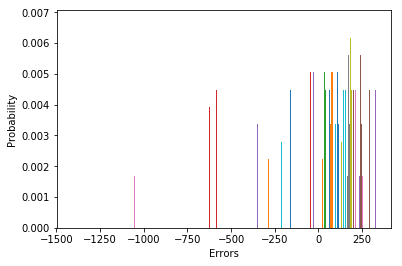

In [80]:
import matplotlib.pyplot as plt
plt.hist(pred_error, density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Errors')